## Explore: architectuur analyse

### Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

You can find this in `data/heart_big_train.parq` and `data/heart_big_test.parq`.


In [2]:
from pathlib import Path
import pandas as pd
import tomllib
datadir = Path('../data')
configfile = Path("config.toml")
with configfile.open('rb') as f:                                                                                                                   
    config = tomllib.load(f)
print(config)


{'ptb': 'heart', 'arrhythmia': 'heart_big'}


In [3]:
trainfile = datadir / (config['arrhythmia'] + '_train.parq')
testfile = datadir / (config['arrhythmia'] + '_test.parq')

train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
#number of rows 
print(len(train_df)+len(test_df))
len(train_df), len(test_df)


109446


(87554, 21892)

In [4]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

In [5]:
train_df['139']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.164319
           ...   
87549    0.000000
87550    0.000000
87551    0.000000
87552    0.000000
87553    0.000000
Name: 139, Length: 87554, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[139, :-1]

print(signal)

0      1.000000
1      0.829949
2      0.220812
3      0.043147
4      0.185279
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 139, Length: 187, dtype: float64


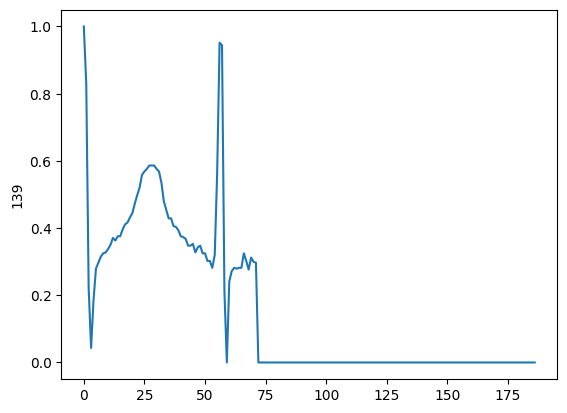

In [7]:
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [13]:
from src import datasets, metrics
traindataset = datasets.HeartDataset1D(trainfile, target="target")
testdataset = datasets.HeartDataset1D(testfile, target="target")
traindataset, testdataset

(Heartdataset (len 87554), Heartdataset (len 21892))

torch.Size([192, 1]) tensor(0)


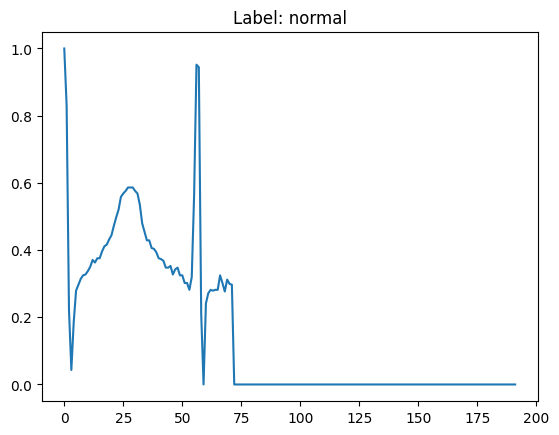

In [16]:
x, y = traindataset[139]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

In [24]:
train_df[train_df['target']==2]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
74694,0.000000,0.009756,0.074390,0.162195,0.240244,0.291463,0.370732,0.442683,0.498780,0.560976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74695,1.000000,0.865672,0.660448,0.458955,0.242537,0.126866,0.164179,0.242537,0.298507,0.350746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74696,0.556728,0.530343,0.440633,0.290237,0.171504,0.055409,0.005277,0.042216,0.000000,0.013193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74697,1.000000,0.968031,0.782609,0.512788,0.418159,0.381074,0.347826,0.320972,0.312020,0.295396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
74698,0.000000,0.037681,0.101449,0.215942,0.236232,0.349275,0.389855,0.485507,0.539130,0.601449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80477,0.984199,0.975169,0.880361,0.848758,0.794582,0.753950,0.715576,0.584650,0.336343,0.194131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80478,0.528846,0.455128,0.285256,0.000000,0.022436,0.054487,0.080128,0.064103,0.086538,0.064103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80479,0.930921,0.927632,0.690789,0.250000,0.000000,0.021382,0.087171,0.125000,0.215461,0.302632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80480,0.996124,0.997416,0.830749,0.534884,0.450904,0.408269,0.369509,0.355297,0.342377,0.337209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


torch.Size([192, 1]) tensor(2)


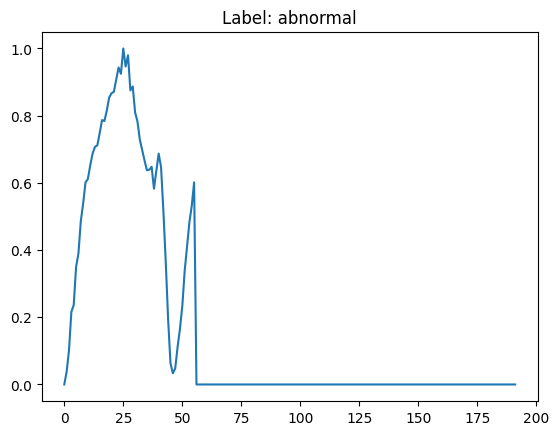

In [25]:

x, y = traindataset[74698]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

torch.Size([192, 1]) tensor(3)


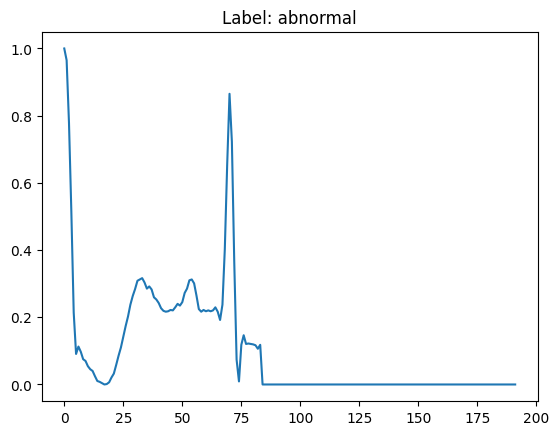

In [ ]:
x, y = traindataset[81121]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

In [ ]:
# Exploration notes en observations
- Dataset is a time series
- Dataset is unbalanced (class 3 has 0.75 of the data)
- The signal is not normalized?
- The signal is not centered due to padding, padding maakt de data points te groot?

# about the 1D model
- The model is a transformer with a transformer block and 1D convolutional layer

Transofrmer block with the following hyperparameters:
16 hidden units
Dropout  0.1
heads 4

Transformer is 1D conv
1 block
1 positional encoding
2x skiplayer

Accuracy: model presteert slecht met 1, 2, 3 

# about the 2D model
- Model CNN 2D bestaat uit:
2 layers with ReLU
1 MaxPool2d layer
Dense layer bestaat uit 2 linear layers

Hyperparameters:
- 16 hidden units
- 1 block met 2 conv

Accuracy: 96% but with a low accuracy for class 3 and 5



**Precision**: Hoeveel van de voorspellingen voor een bepaalde klasse zijn daadwerkelijk correct? 
**Precision** (ook wel **positieve voorspellingsnauwkeurigheid**) geeft aan hoeveel van de voorspellingen van de positieve klasse correct zijn. 
Dit is vooral belangrijk wanneer je wilt weten hoe betrouwbaar de voorspellingen van een specifieke klasse zijn.

**Recall**: Hoeveel van de werkelijke gevallen van een bepaalde klasse zijn correct voorspeld? 
Recall (ook wel gevoeligheid of True Positive Rate) geeft aan hoeveel van de **werkelijke positieve gevallen correct** door het model worden voorspeld. 
Het is de maatstaf voor hoe goed het model in staat is om positieve gevallen te detecteren binnen elke klasse.

# Macro F1 score
Voor alle experimenten (gezien de medische aard) is F1 score van belang vooral bij ongebalanceerde datasets. Uit eigen onderzoek heb ik het volgende begrepen:
F1 score: Bereken de F1-score per klasse en neem vervolgens het gemiddelde van die scores. Dit betekent dat elke klasse evenveel gewicht krijgt bij de berekening, ongeacht het aantal voorbeelden in de klasse (en dus ongeacht hoe frequent of zeldzaam de klasse is).
Macro Precision metric geeft meer inzicht in het verschil tussen de prestaties van de klassen
Macro Recall geeft gemiddelde recall over alle klassen, waarbij elke klasse gelijk wordt gewogen.

# Experiment 1 16 januari
Netwek verbreden: Toevoeging hidden units in beide modellen zou de accuracy moeten verhogen (meer capaciteit)
Verdubbeling van hidden units naar 32 in beide modellen 
Maak model dieper (1 block meer)


## 2D conv: observaties
meer capaciteit verbetert accuracy en geeft de hoogste F1score macro
de accuracy met 2 blocks (4 conv layers) is slechter dan met 1 block en het model ga overfitten en de accuracy van prediction 2 en 3 is zelfs slechter
In het algemeen een 2D conv doet het beter maar overfit snel en presteert niet goed als het dieper wordt gemaakt.
Dit kan wijzen tot het feit dat een 2D conv geen geschikte model is voor deze timeseries, omdat bij diepere lagen de informatie verloren gaat.
Naar verwachting zou een GRU of LSTM betere prestaties leveren omdat het geschikter is als timeseriemodel.

## 1D conv + transformer: observaties
Bredere model: meer hidden units verbeter accuracy maar verschillen zijn minimaal
Dieper model: meer blocken (verdubbeling van multihead attention) bereikt resultaten die vergelijkbaar zijn met de 2D conv. met het verschil dat prediction 3 beter is.
Zowel de F1scoremacro als accuracy zijn beter met meer hidden units en meer lagen, alleen lijkt dit een vrij complex model (overkill) voor deze dataset.
Bovendien, lost dit model niet het grootste probleem, namelijk het feit dat een klasse (met weinig data) niet voldoende gedetecteerd wordt.
Transformer met een diepere structuur en een meer capaciteit bereikt een hogere accuracy en lijkt net zo goed als de 2Dconv te overfitten
Pred. van class 3 (wegens gebrek aan data) is overal een probleem, de Transformer met dubbele multiheads kan de hoogste accuracy bereiken (0.389), dit is 0.10 hoger dan een 2D conv met 32 hidden units.
In het algemeen doe de 2D model beter maar lijk ook sneller te overfitten (de train-prediction van klass 0, 1 en 3 zijn hetzelfde?)


# algemene observaties conclusies
Het 2D conv model is ongeschikt voor de classificatie, het volgende experiment zal een GRU of LSTM worden gebruikt
Het transformer model presteert beter met meer hidden units en meer attention maar traint langer en groeit exponentieel, wat voor deze dataset misschien overbodig is.
Het feit dat de dataset ongebalanceerd is, maakt het moeilijk om de dataset als zodanig te trainen. Het moet een oplossing komen voor het balanceren van de dataset.
Ik overweeg een autoencoder te testen gezien het grote aantal data in de klasse 'normaal' is dit een goede basis om een autoencoder model te gebruiken.


# Experiment 2:
- LSTM of GRU testen ipv 2D conv model
- Autoencoder idee verder onderzoeken
- 1D Transformer testen met een aangepaste input (weet nog niet welke), bijv. data-augmetatie of dergelijks

